In [1]:
from pathlib import Path
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [6]:
df = pd.read_csv("../Resources/songAttributes_1999-2019.csv")
df.head()

spotify_df_clean = df[df["Popularity"] > 50]
spotify_df_clean

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
77,77,0.294000,"Hints, Allegations & Things Left Unsaid",Collective Soul,0.540,306040,0.423,False,0.088400,0.1520,-8.799,1,Shine,69,0.0283,150.135,4,0.353
258,106,0.014400,White Trash Beautiful,Everlast,0.628,241333,0.706,False,0.012100,0.0747,-5.342,1,White Trash Beautiful,55,0.0286,79.985,4,0.473
274,122,0.090400,Whitey Ford Sings the Blues,Everlast,0.678,303133,0.556,True,0.033400,0.0866,-7.423,1,What It's Like,63,0.0281,85.158,4,0.405
473,54,0.039900,Buenas Noches From A Lonely Room,Dwight Yoakam,0.740,168213,0.703,False,0.000006,0.0378,-11.870,1,Streets of Bakersfield,55,0.0576,106.878,4,0.816
568,149,0.126000,"Guitars, Cadillacs, Etc., Etc.",Dwight Yoakam,0.673,167426,0.840,False,0.000059,0.1750,-5.114,1,Honky Tonk Man,56,0.0381,144.184,4,0.749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154926,114,0.333000,No.6 Collaborations Project,Ed Sheeran,0.747,200733,0.649,False,0.000000,0.1720,-6.218,0,Nothing On You (feat. Paulo Londra & Dave),80,0.2190,88.011,4,0.840
154927,115,0.314000,No.6 Collaborations Project,Ed Sheeran,0.469,204507,0.631,False,0.000000,0.1400,-6.569,0,I Don't Want Your Money (feat. H.E.R.),74,0.0853,91.418,4,0.763
154928,116,0.467000,No.6 Collaborations Project,Ed Sheeran,0.778,212307,0.590,False,0.000000,0.0902,-5.548,1,1000 Nights (feat. Meek Mill & A Boogie Wit da...,75,0.2700,97.995,4,0.515
154929,117,0.110000,No.6 Collaborations Project,Ed Sheeran,0.726,190293,0.731,False,0.000003,0.0928,-6.304,0,Way To Break My Heart (feat. Skrillex),73,0.1590,170.125,4,0.430


In [7]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, title, line_place):
    slope, y_intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    reg_values = x_values * slope + y_intercept
    line = f"Y = {str(round(slope , 2))} + X + {str(round(y_intercept, 2))}"
    plt.scatter(x_values, y_values, facecolor = "blue", edgecolor = "black")
    plt.plot(x_values, reg_values, color = "red")
    plt.annotate(line, line_place, color = "green", fontsize = 12 )
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.show()
    print(str(title))
    print(f"The r value is: {rvalue}")
    print(f"The p value is: {pvalue}")

In [10]:
spotify_df_clean.columns

Index(['Unnamed: 0', 'Acousticness', 'Album', 'Artist', 'Danceability',
       'Duration', 'Energy', 'Explicit', 'Instrumentalness', 'Liveness',
       'Loudness', 'Mode', 'Name', 'Popularity', 'Speechiness', 'Tempo',
       'TimeSignature', 'Valence'],
      dtype='object')

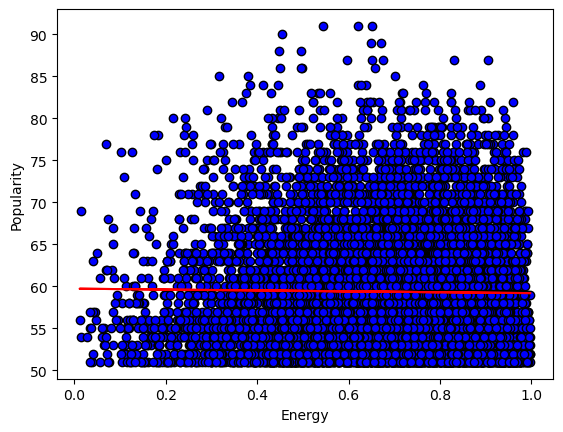

...
The r value is: -0.0149018837943598
The p value is: 0.1622209771524129


In [13]:
x_values = spotify_df_clean["Energy"]
y_values = spotify_df_clean["Popularity"]

lin_reg(x_values, y_values, "...", (0, 0))